In [2]:
import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from collections import Counter
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
stemmerl = LancasterStemmer()
stemmerp = PorterStemmer()
stemmers = SnowballStemmer('english')
stemmerwn = WordNetLemmatizer()

In [3]:
subs = ['wsb', 'science', 'ama', 'askreddit', 'worldnews', 'funny', 'dankmemes', 'memes', 'nosleep', 'psychology', 'politics', 'cscareerquestions', 'writingprompts']

# Load pickled files
data = {}
for i, c in enumerate(subs):
    with open("/home/nick/Documents/Reddit_NLP/pickles/" + c + ".pickle", "rb") as file:
        data[c] = pickle.load(file)

In [4]:
# Turn lists of comments into one big string
def combine_text(comments):
    combined_text = ' '.join(comments)
    return combined_text
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [11]:
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['text']
# data_df = data_df.sort_index()
data_df

,text
wsb,In the future when Apple is at 50000 a share your gran kids will ask why you didn’t buy Apple at 400. And you’ll answer with “I bought corn instea...
science,"> The children were not motivated by achieving the maximum reward to the extent that adults were,” Blanco said. “Instead, children seemed primaril..."
ama,Tldr: do whatever the fuck you want. So you're telling me people on the internet LIE???? [removed] This is so funny this subreddit got fucked by o...
askreddit,"Victoria’s Secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed, but now it’s almost excl..."
worldnews,"So was there any posts left after the purge? Ok, just for some context:\n\nFacebook has an estimated ~100 million fake user accounts.\nEvery month..."
funny,"But I wanted the robot ferret. Haha! Suck it you fools, I already got my robotic ferret from a mod! This not funny!\nRule number...... Oh, I forge..."
dankmemes,"Meme of the Month Seeding and Nominations for July 2020!\n\n# How do nominations work?\n\nTo nominate a meme, simply comment a name of a meme that..."
memes,"RedditMC is opening staff positions: Builders, Helpers (To become mod), Devs, GameMasters...\n\nMore infos [here](https://www.reddit.com/r/RedditM..."
nosleep,It looks like there may be more to this story. Click [here](https://www.reddit.com/message/compose/?to=UpdateMeBot&subject=Subscribe&message=Subsc...
psychology,"**\[Academic\] Decisions Regarding Mental Health Care (Canada, 17+)**\n\n**Study link**: [https://www.surveymonkey.ca/r/2VNC365](https://www.surve..."


In [12]:
# Clean text

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, remove newlines.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

clean = lambda x: clean_text(x)

data_clean = pd.DataFrame(data_df.text.apply(clean))
data_clean

,text
wsb,in the future when apple is at a share your gran kids will ask why you didnt buy apple at and youll answer with i bought corn instead you ever s...
science,the children were not motivated by achieving the maximum reward to the extent that adults were blanco said instead children seemed primarily moti...
ama,tldr do whatever the fuck you want so youre telling me people on the internet lie this is so funny this subreddit got fucked by one person a note...
askreddit,victorias secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed but now its almost exclusi...
worldnews,so was there any posts left after the purge ok just for some context facebook has an estimated million fake user accounts every month about bil...
funny,but i wanted the robot ferret haha suck it you fools i already got my robotic ferret from a mod this not funny rule number oh i forget carry on bu...
dankmemes,meme of the month seeding and nominations for july how do nominations work to nominate a meme simply comment a name of a meme that started or ...
memes,redditmc is opening staff positions builders helpers to become mod devs gamemasters more infos using this to see if i have new flair cries in be...
nosleep,it looks like there may be more to this story click to get a reminder to check back later got issues click httpswwwredditcomrnosleepwikinosleepau...
psychology,decisions regarding mental health care canada study link you are invited to participate in a study named decisions regarding mental health ca...


In [13]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['text'].apply(pol)
data_clean['subjectivity'] = data_clean['text'].apply(sub)
data_clean

,text,polarity,subjectivity
wsb,in the future when apple is at a share your gran kids will ask why you didnt buy apple at and youll answer with i bought corn instead you ever s...,0.050787,0.511407
science,the children were not motivated by achieving the maximum reward to the extent that adults were blanco said instead children seemed primarily moti...,0.085984,0.486265
ama,tldr do whatever the fuck you want so youre telling me people on the internet lie this is so funny this subreddit got fucked by one person a note...,0.138438,0.530521
askreddit,victorias secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed but now its almost exclusi...,0.096209,0.513233
worldnews,so was there any posts left after the purge ok just for some context facebook has an estimated million fake user accounts every month about bil...,0.057882,0.495403
funny,but i wanted the robot ferret haha suck it you fools i already got my robotic ferret from a mod this not funny rule number oh i forget carry on bu...,0.111986,0.539337
dankmemes,meme of the month seeding and nominations for july how do nominations work to nominate a meme simply comment a name of a meme that started or ...,0.073701,0.529738
memes,redditmc is opening staff positions builders helpers to become mod devs gamemasters more infos using this to see if i have new flair cries in be...,0.074596,0.538945
nosleep,it looks like there may be more to this story click to get a reminder to check back later got issues click httpswwwredditcomrnosleepwikinosleepau...,0.090537,0.524635
psychology,decisions regarding mental health care canada study link you are invited to participate in a study named decisions regarding mental health ca...,0.087824,0.484784


In [16]:
data_clean['subreddit'] = subs
data_clean

,text,polarity,subjectivity,subreddit
wsb,in the future when apple is at a share your gran kids will ask why you didnt buy apple at and youll answer with i bought corn instead you ever s...,0.050787,0.511407,wsb
science,the children were not motivated by achieving the maximum reward to the extent that adults were blanco said instead children seemed primarily moti...,0.085984,0.486265,science
ama,tldr do whatever the fuck you want so youre telling me people on the internet lie this is so funny this subreddit got fucked by one person a note...,0.138438,0.530521,ama
askreddit,victorias secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed but now its almost exclusi...,0.096209,0.513233,askreddit
worldnews,so was there any posts left after the purge ok just for some context facebook has an estimated million fake user accounts every month about bil...,0.057882,0.495403,worldnews
funny,but i wanted the robot ferret haha suck it you fools i already got my robotic ferret from a mod this not funny rule number oh i forget carry on bu...,0.111986,0.539337,funny
dankmemes,meme of the month seeding and nominations for july how do nominations work to nominate a meme simply comment a name of a meme that started or ...,0.073701,0.529738,dankmemes
memes,redditmc is opening staff positions builders helpers to become mod devs gamemasters more infos using this to see if i have new flair cries in be...,0.074596,0.538945,memes
nosleep,it looks like there may be more to this story click to get a reminder to check back later got issues click httpswwwredditcomrnosleepwikinosleepau...,0.090537,0.524635,nosleep
psychology,decisions regarding mental health care canada study link you are invited to participate in a study named decisions regarding mental health ca...,0.087824,0.484784,psychology


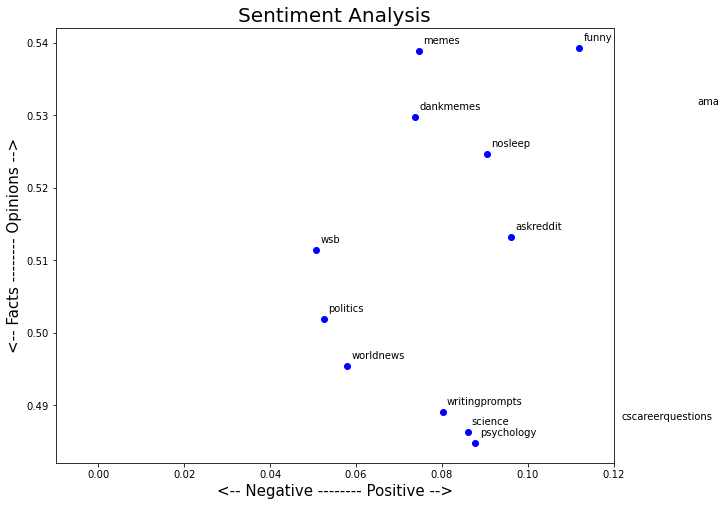

In [19]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, subreddit in enumerate(data_clean.index):
    x = data_clean.polarity.loc[subreddit]
    y = data_clean.subjectivity.loc[subreddit]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_clean['subreddit'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()